<b><h3>MSET AutoEncoder</h3></b>

MSET기법을 이용 train 정상 데이터만을 학습 시켜서 test data에서 이상을 판단
&nbsp;

bootstrap 기법을 이용해서 UCL, LCL을 정의 후
&nbsp;

AutoEncoder에서 나온 reconstruction error를 이용해서 이상감지 알고리즘을 구현

In [23]:
data = read.csv("C:\\Users\\User\\Desktop\\수업\\빅데이터분석실무\\data\\eeg_tr.txt")

In [24]:
# train 데이터를 정상데이터라고 가정
train_mat = as.matrix(data[1:3000,3:ncol(data)])
test_mat = as.matrix(data[3001:nrow(data), 3:ncol(data)])

In [25]:
head(train_mat)
head(test_mat)

c1,c2,c3,c4,c6,c7,c8,c10,c11,c12,c13,c14,c17,c18,c19,c20,c21,c22
15.925749,-12.698804,-32.0735010,-16.323747,-6.323903,-19.4486982,-27.323575,10.050841,5.0509189,4.175933,8.300868,6.925890,1.80097,0.5509893,0.05099707,3.550942,-5.698913,126.04903
-61.198046,-19.198702,-5.6989131,8.300868,-22.823646,-2.6989600,22.925640,-36.073438,-34.6984600,-6.323903,-17.573728,-5.698913,-30.57352,-23.9486279,0.05099707,1.300978,9.550849,17.55072
-36.573431,-20.573681,-3.1989521,6.550896,-33.073485,0.9259834,30.050528,-24.448620,-18.9487060,5.300915,-19.448698,-5.823911,-16.07375,-1.0739854,-0.32399707,9.300853,11.300821,-129.57198
5.675909,12.300806,0.1759951,5.300915,46.050278,10.9258271,45.675284,8.425866,-0.4489951,-3.073954,6.050903,1.425976,26.55058,5.8009072,-0.07400098,30.050528,7.425882,-63.32301
7.675878,3.050950,-7.8238799,-4.948925,-17.448729,-2.3239658,5.800907,2.675956,13.5507861,11.800813,2.550958,7.175886,13.55079,-0.4489951,0.30099316,28.550552,17.675722,27.42557
-2.698960,-4.448933,-1.5739775,5.675909,5.425913,5.4259131,23.425632,-6.198905,8.6758623,3.050950,7.800876,9.050856,-12.07381,0.9259834,0.17599512,13.300790,10.300837,-62.94802


,c1,c2,c3,c4,c6,c7,c8,c10,c11,c12,c13,c14,c17,c18,c19,c20,c21,c22
3001,-142.94677,-72.69787,-36.94842,-28.698554,-20.573681,-24.823614,-16.448745,-97.94747,-47.19826,-29.94853,-119.94713,-59.448073,-74.57284,-34.94846,-0.32399707,-7.82388,-18.323716,-171.321325
3002,-155.32158,-68.44793,-36.07344,-20.698679,-23.948628,-15.073767,-11.073829,-108.94730,-54.94814,-31.44851,-140.44681,-34.823458,-87.57263,-43.69832,-0.07400098,33.80047,-9.948847,600.041622
3003,-96.82249,-50.19822,-10.07384,-15.448761,-9.948847,-4.823927,-34.573462,-80.44775,-25.69860,-11.57382,-129.82197,-28.073563,-46.44828,-21.44867,-0.44899512,15.05076,-23.698632,30.800517
3004,-68.82293,-38.19841,-19.57370,-9.323856,6.050903,3.175948,5.925905,-47.57326,-19.07370,-11.07383,-97.07249,-7.698882,-32.82349,-19.94869,-0.07400098,13.05079,-6.448901,100.049435
3005,101.42441,35.30045,20.17568,14.300774,83.674690,32.550489,56.925108,28.80055,22.80064,15.80075,52.05018,40.550364,37.55041,16.30074,-0.07400098,78.17478,55.175136,90.049591
3006,71.42488,19.05070,21.05067,16.050747,6.175901,18.300712,13.175792,46.42527,36.42543,11.80081,43.92531,22.300649,53.30017,39.17539,0.17599512,-12.82380,-1.448979,8.925858


In [26]:
# AutoEncoder
# install.packages('autoencoder')
library(autoencoder)

In [27]:
attributes(fit)

$names
 [1] "W"                       "b"                      
 [3] "unit.type"               "rescaling"              
 [5] "nl"                      "sl"                     
 [7] "N.input"                 "N.hidden"               
 [9] "mean.error.training.set" "mean.error.test.set"    

$class
[1] "autoencoder"

In [33]:
# AutoEncoder Parameter
nl=3 ## number of layers (default is 3: input, hidden, output)
unit.type = "logistic" ## specify the network unit type, i.e., the unit's
## activation function ("logistic" or "tanh")

N.input = 15 ## number of units (neurons) in the input layer (one unit per pixel)
N.hidden = 5 ## number of units in the hidden layer
lambda = 0.0002 ## weight decay parameter
beta = 6 ## weight of sparsity penalty term
rho = 0.01 ## desired sparsity parameter
epsilon <- 0.001 ## a small parameter for initialization of weights
## as small gaussian random numbers sampled from N(0,epsilon^2)
max.iterations = 100 ## number of iterations in optimizer

In [29]:
fit <- autoencode(X.train=train_mat,nl=nl,N.hidden=N.hidden,
                  unit.type=unit.type,lambda=lambda,beta=beta,rho=rho,epsilon=epsilon,
                  optim.method="BFGS",max.iterations=max.iterations,
                  rescale.flag=TRUE,rescaling.offset=0.001)

autoencoding...
Optimizer counts:
function gradient 
      74       68 
Optimizer: successful convergence.
Optimizer: convergence = 0, message = 
J.init = 19.27266, J.final = 0.007760414, mean(rho.hat.final) = 0.009999999


In [30]:
attributes(fit)

$names
 [1] "W"                       "b"                      
 [3] "unit.type"               "rescaling"              
 [5] "nl"                      "sl"                     
 [7] "N.input"                 "N.hidden"               
 [9] "mean.error.training.set" "mean.error.test.set"    

$class
[1] "autoencoder"

In [31]:
# reconstruction X
train_pred = predict(fit, train_mat)
pred_train_x = train_pred$X.output

Warning message in if (hidden.output == FALSE) {:
"length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다"Warning message in if (hidden.output == TRUE) {:
"length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다"

In [32]:
# train reconstruction error
train_recon_error = sqrt(rowSums((train_mat-pred_train_x)^2))

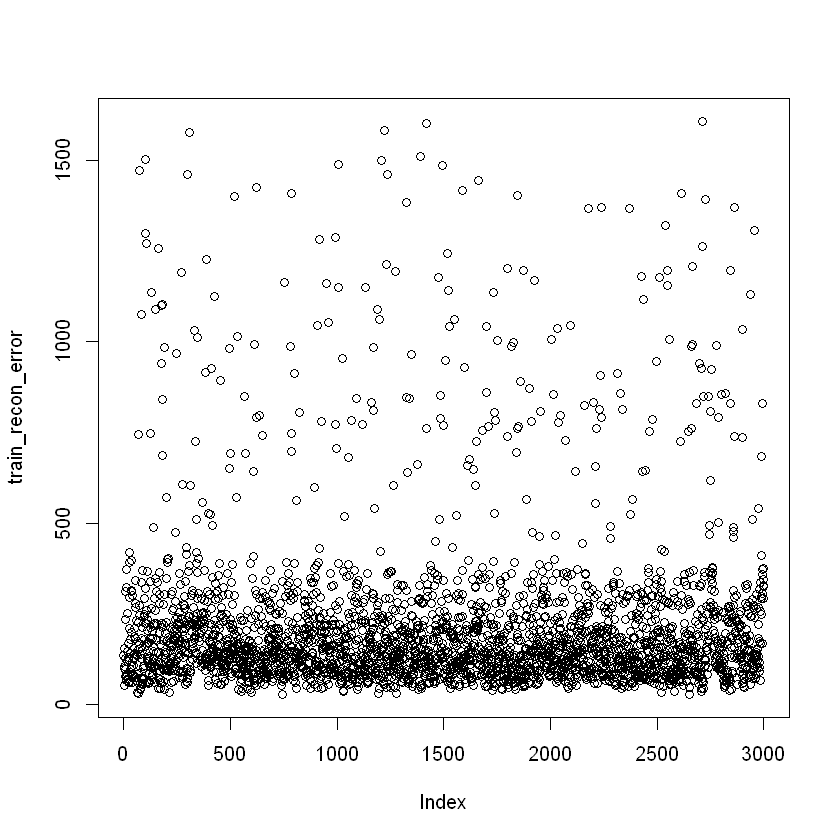

In [13]:
# plot train reconstruction error
plot(train_recon_error)

In [15]:
# bootstrap을 이용한 UCL, LCL 산출
bootlimit <- function(stat, alpha, m){ 
  sam_mat = matrix(0,1,m)
  ucl_mat = matrix(0,1,m)
  lcl_mat = matrix(0,1,m)
  
  for(i in 1:m){
    sample_temp = sample(stat, size=length(stat), replace=T, prob=NULL)
    ucl = quantile(sample_temp, (1-(alpha/2)))
    lcl = quantile(sample_temp, (alpha)/2)
    ucl_mat[,i] = ucl
    lcl_mat[,i] = lcl
  }
  ucl = mean(ucl_mat)
  lcl = mean(lcl_mat)  
  
  ret = list(ucl=ucl, lcl=lcl)
  
  return(ret)
}

In [16]:
# bootstrap based UCL, LCL
cl = bootlimit(train_recon_error, 0.05, m=1000)
limits = matrix(0,2,1)
limits[1,1] = cl$ucl
limits[2,1] = cl$lcl

In [17]:
# 위: UCL, 아래: LCL
limits

1013.10708
52.42013


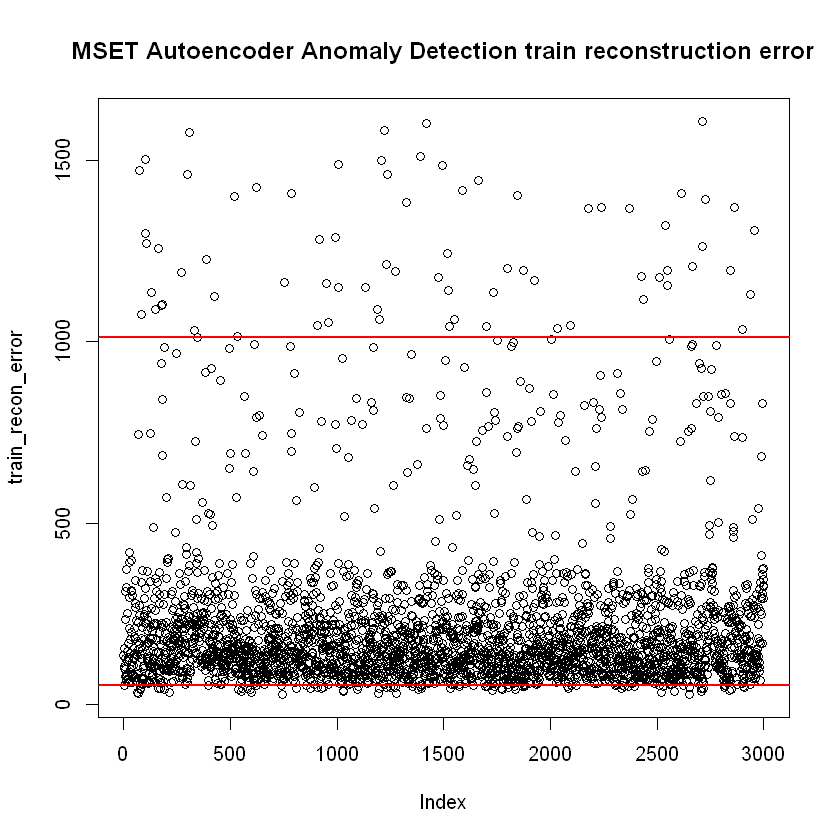

In [18]:
plot(train_recon_error, main='MSET Autoencoder Anomaly Detection train reconstruction error')
abline(h=limits[1,], col='red', lwd=2)
abline(h=limits[2,], col='red', lwd=2)

In [19]:
# apply to test data
test_pred = predict(fit,test_mat)
pred_test_x = test_pred$X.output
test_recon_error = sqrt(rowSums((test_mat - pred_test_x)^2))

Warning message in if (hidden.output == FALSE) {:
"length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다"Warning message in if (hidden.output == TRUE) {:
"length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다"

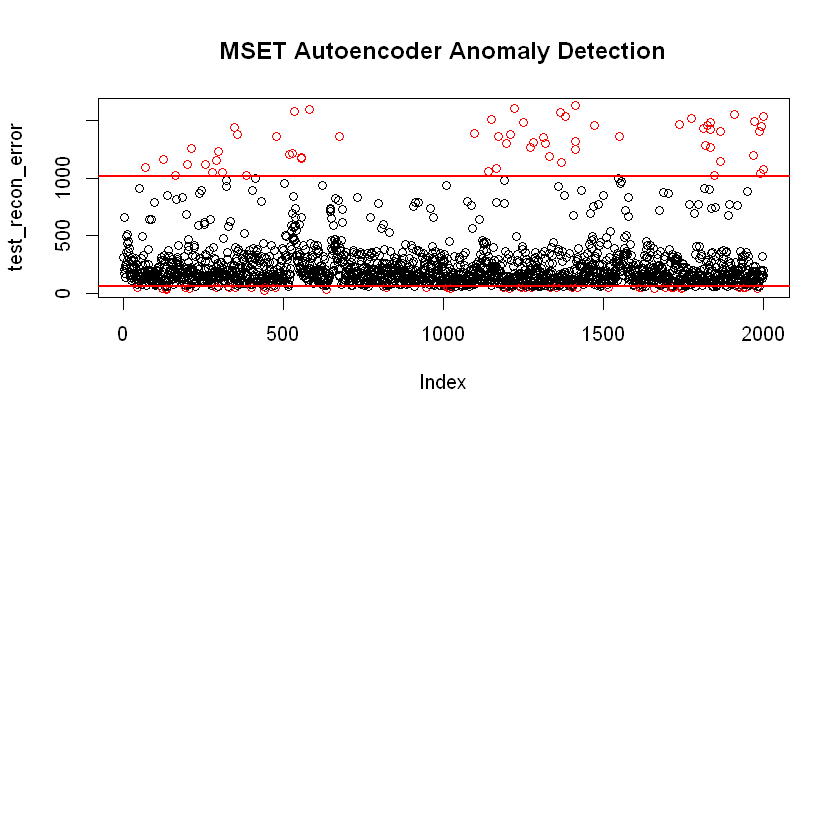

In [22]:
outlier = test_recon_error>limits[1,] | test_recon_error<limits[2,]

par(mfrow=c(2,1))
plot(test_recon_error, main='MSET Autoencoder Anomaly Detection', col=outlier+1)
abline(h=limits[1,], col='red', lwd=2)
abline(h=limits[2,], col='red', lwd=2)